# World mental health analysis

In [8]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.cluster import AgglomerativeClustering

In [6]:
df = pd.read_csv('mhm_data_2024-10-10_17-07-23.csv',sep=',',index_col=0, low_memory=False)

The data set covers only one year - 2023. Due to its large volume, I could not downolad other 2 years that the project covered.
It takes a while to load into jupyter. For analyis that requires more computational power, I will reduce its volume by random sampling.  

In [6]:
df.head()

,Start Date (UTC),Submit Date (UTC),Time to completion,Overall MHQ,Cognition Dimension,Adaptability & Resilence Dimension,Drive & Motivation Dimension,Mood & Outlook Dimension,Social & Self Dimension,Mind Body Connection Dimension,...,ARCHIVED: Covid: financial adversities,ARCHIVED: Depression Benchmarking (frequency),ARCHIVED: Depression Benchmarking (severity),Admin Use 1,Admin Use 2,Admin Use 3,Admin Use 4,Admin Use 5,Repeat identifier,Repeat identifier 2
Language,,,,,,,,,,,,,,,,,,,,,
Spanish,2023-03-20 16:02:18,2023-03-20 16:18:37,0:16:19,44.7,-5.4,114.6,43.7,51.7,90.3,85.9,...,NaN,NaN,NaN,1,1,1,2,NaN,NaN,NaN
Brazilian Portuguese,2023-03-20 18:52:38,2023-03-20 19:09:29,0:16:51,135.4,129.0,134.1,124.1,132.7,145.2,112.7,...,NaN,NaN,NaN,1,1,1,2,NaN,NaN,NaN
Hindi,2023-03-20 15:42:18,2023-03-20 16:13:36,0:31:18,146.8,140.8,-1.1,200.0,179.5,183.1,150.9,...,NaN,NaN,NaN,1,1,1,2,NaN,NaN,NaN
English,2023-03-20 15:02:37,2023-03-20 15:31:10,0:28:33,88.2,81.7,80.5,52.9,82.9,90.3,116.4,...,NaN,NaN,NaN,1,1,5,2,NaN,cea5360eab246563a738a95736b978f46620977a8c093f...,NaN
Spanish,2023-03-20 14:18:36,2023-03-20 15:32:49,1:14:13,174.9,187.0,163.4,174.7,165.9,182.3,167.3,...,NaN,NaN,NaN,1,1,1,2,NaN,NaN,NaN


In [8]:
df.describe()

,Overall MHQ,Cognition Dimension,Adaptability & Resilence Dimension,Drive & Motivation Dimension,Mood & Outlook Dimension,Social & Self Dimension,Mind Body Connection Dimension,Adaptability to Change,Self Worth & Confidence,Creativity & Problem Solving,...,ARCHIVED: Pregnant,ARCHIVED: Covid: health & social adversities,ARCHIVED: Covid: financial adversities,ARCHIVED: Depression Benchmarking (frequency),ARCHIVED: Depression Benchmarking (severity),Admin Use 1,Admin Use 2,Admin Use 3,Admin Use 4,Repeat identifier 2
count,518106.000000,518106.000000,518106.000000,518106.000000,518106.000000,518106.000000,518106.000000,518100.000000,518103.000000,518103.000000,...,0.0,0.0,0.0,0.0,0.0,518106.000000,518106.000000,518106.000000,518106.000000,0.0
mean,68.908830,81.259934,91.531527,85.846293,68.694055,71.630502,74.997648,5.882011,6.012111,6.593903,...,NaN,NaN,NaN,NaN,NaN,1.610935,1.241258,2.488444,7.083562,NaN
std,72.983462,67.754309,67.936254,66.572526,71.583203,77.132542,64.836766,2.130560,2.326980,2.040851,...,NaN,NaN,NaN,NaN,NaN,0.843256,0.439112,1.610177,21.777240,NaN
min,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,NaN
25%,-0.200000,18.900000,45.100000,34.500000,-2.500000,-5.200000,22.700000,5.000000,5.000000,5.000000,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,NaN
50%,80.600000,93.500000,107.300000,98.900000,76.100000,85.500000,86.400000,6.000000,6.000000,7.000000,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,2.000000,2.000000,NaN
75%,130.400000,138.500000,145.100000,140.200000,130.700000,140.300000,125.500000,7.000000,8.000000,8.000000,...,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,4.000000,2.000000,NaN
max,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,9.000000,9.000000,9.000000,...,NaN,NaN,NaN,NaN,NaN,3.000000,6.000000,6.000000,106.000000,NaN


In [10]:
df.columns

Index(['Start Date (UTC)', 'Submit Date (UTC)', 'Time to completion',
       'Overall MHQ', 'Cognition Dimension',
       'Adaptability & Resilence Dimension', 'Drive & Motivation Dimension',
       'Mood & Outlook Dimension', 'Social & Self Dimension',
       'Mind Body Connection Dimension',
       ...
       'ARCHIVED: Covid: financial adversities',
       'ARCHIVED: Depression Benchmarking (frequency)',
       'ARCHIVED: Depression Benchmarking (severity)', 'Admin Use 1',
       'Admin Use 2', 'Admin Use 3', 'Admin Use 4', 'Admin Use 5',
       'Repeat identifier', 'Repeat identifier 2'],
      dtype='object', length=192)

In [12]:
df.shape

(518106, 192)

It is a large data set. I wondered whether all columns are needed, and as predicted - not really. Many of them are archived or just won't bring much to our analysis (because of their too high level of detail). 

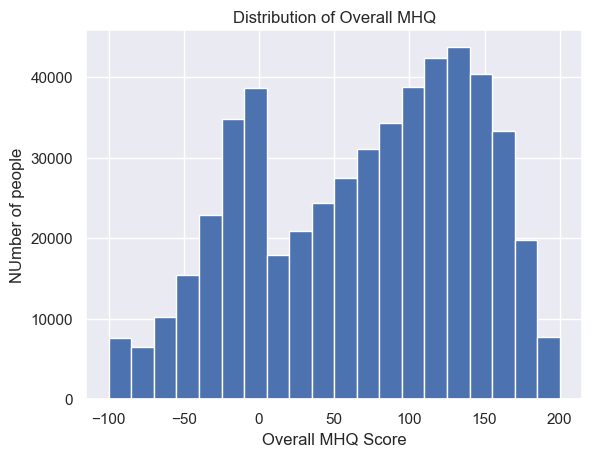

In [14]:
plt.hist(df['Overall MHQ'], bins=20, edgecolor='white')

plt.xlabel('Overall MHQ Score')
plt.ylabel('NUmber of people')
plt.title('Distribution of Overall MHQ')
plt.grid(True)
plt.show()

After seeing this initial interesting distribution I wondered which factors influenced it to form its current shape. Despite the large number of poeple, overall MHQ scores are not normally distributed and seem to be negatively skewed, apart from the large volume of data around 0 to -50 scores. 

Let's break down the overall MHQ scores by different factors. 

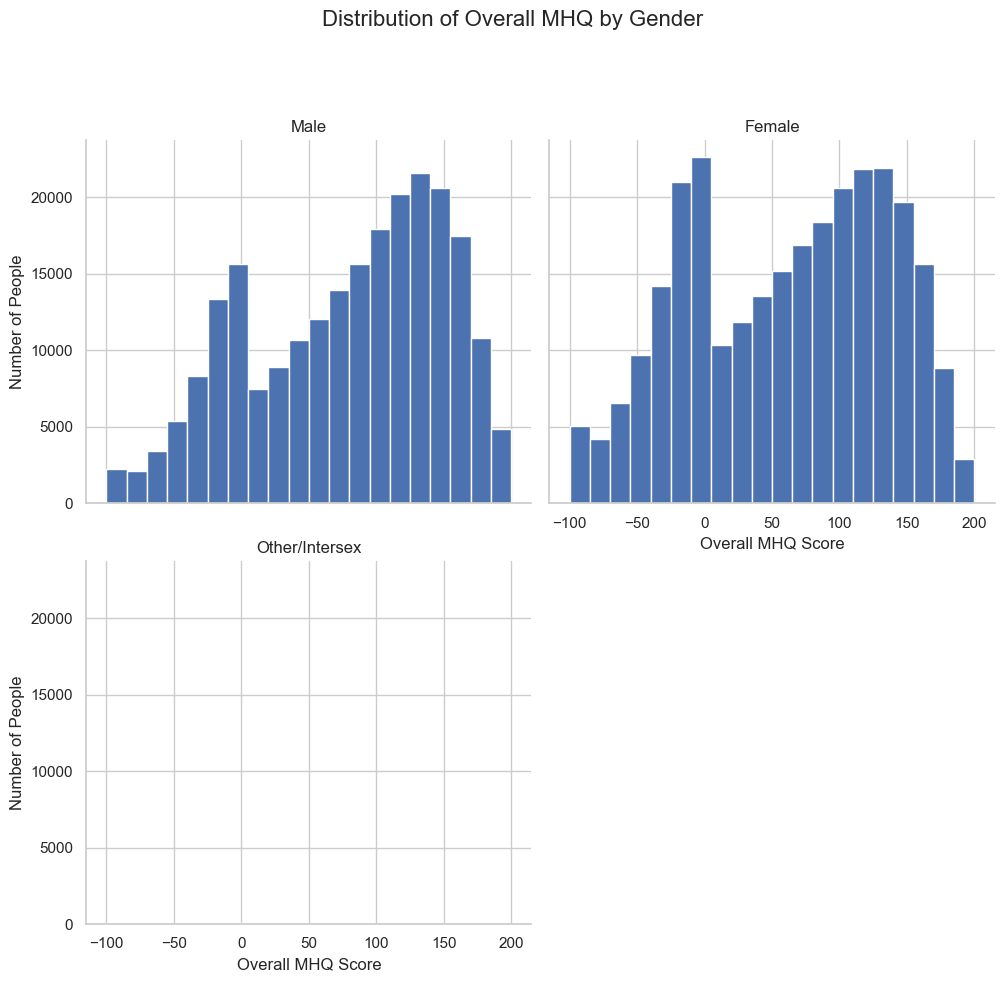

In [18]:
filtered_df = df[df['Biological Sex'].isin(['Female', 'Male', 'Other/Intersex'])]

sns.set(style="whitegrid")

g = sns.FacetGrid(filtered_df, col='Biological Sex', col_wrap=2, height=5, aspect=1)

g.map(plt.hist, 'Overall MHQ', bins=20, edgecolor='white')

g.set_axis_labels('Overall MHQ Score', 'Number of People')
g.set_titles(col_template='{col_name}')
g.fig.suptitle('Distribution of Overall MHQ by Gender', fontsize=16)

plt.subplots_adjust(top=0.85)

plt.show()

Interestingly, females tend to have lower overall MHQ score than males. 

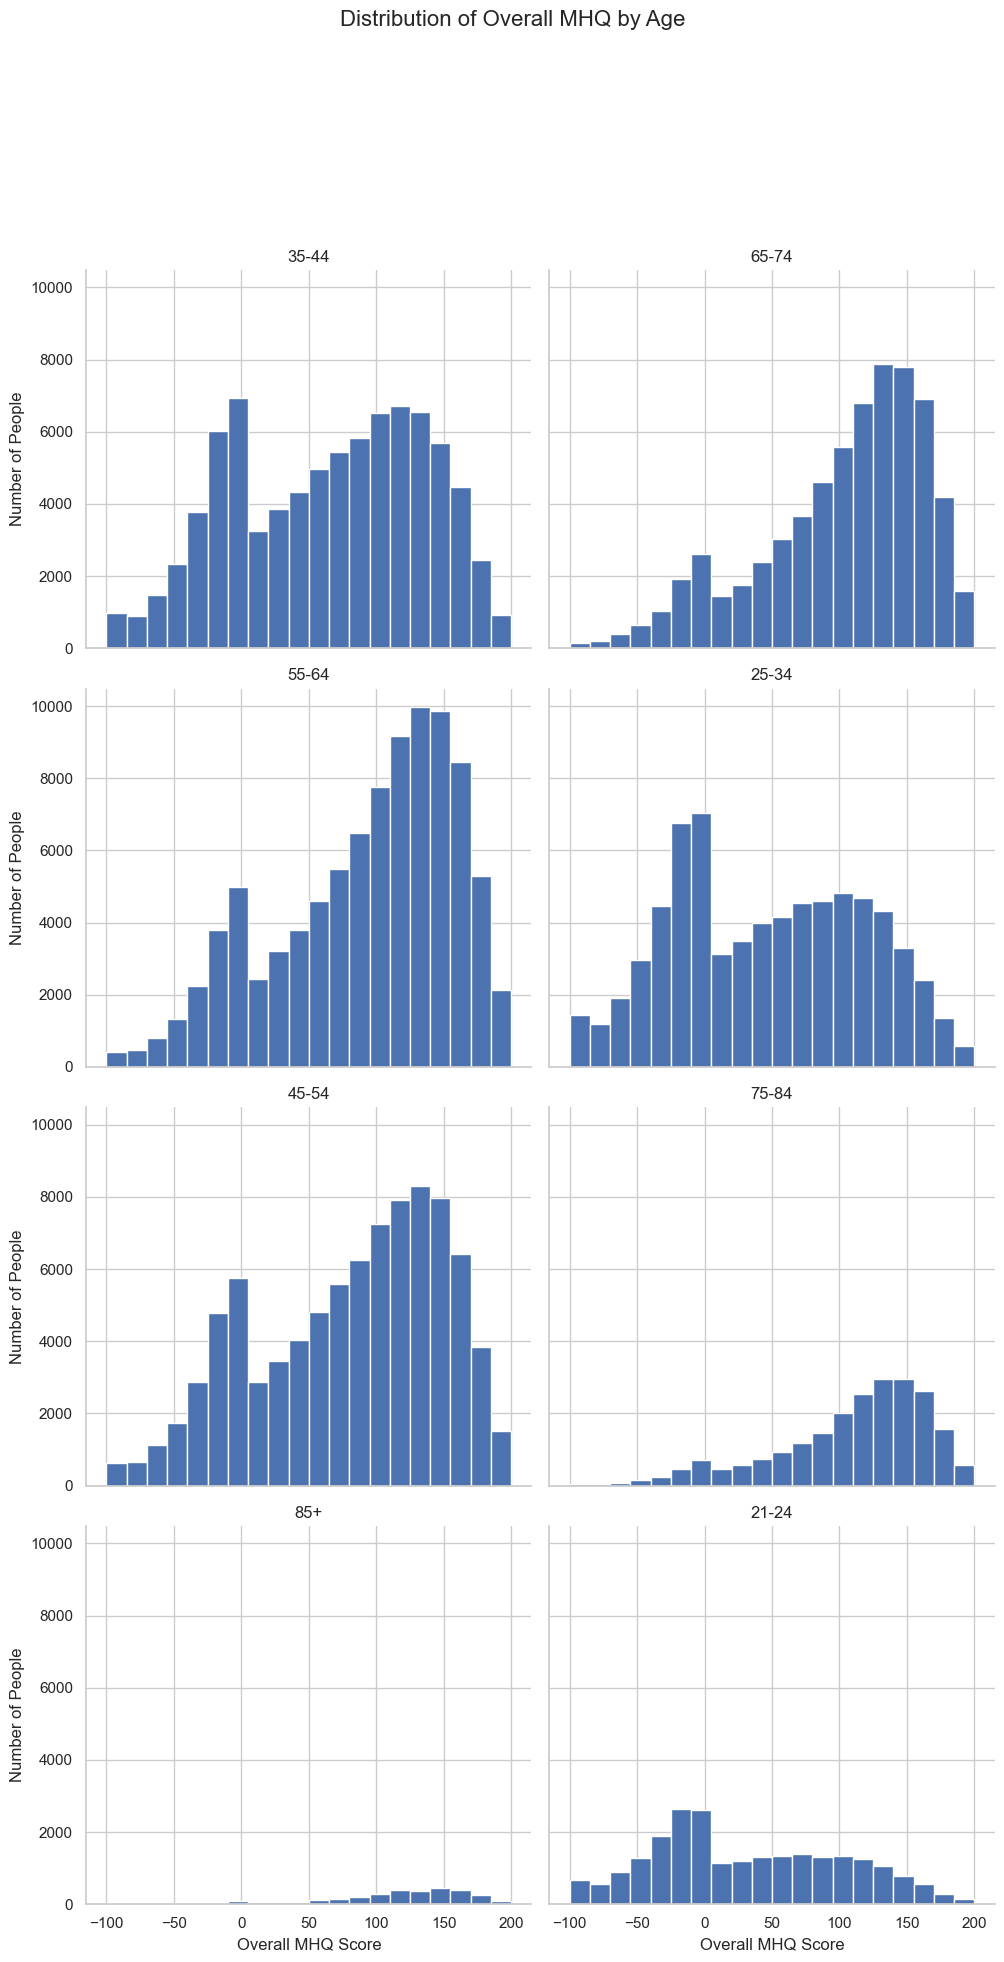

In [20]:
filtered_df = df[df['Age'].isin(['21-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+'])]

sns.set(style="whitegrid")

g = sns.FacetGrid(filtered_df, col='Age', col_wrap=2, height=5, aspect=1)

g.map(plt.hist, 'Overall MHQ', bins=20, edgecolor='white')

g.set_axis_labels('Overall MHQ Score', 'Number of People')
g.set_titles(col_template='{col_name}')
g.fig.suptitle('Distribution of Overall MHQ by Age', fontsize=16)

plt.subplots_adjust(top=0.85)

plt.show()

These graphs don't tell us much as there is different number of people in each age group. To control for that, we should normalise our data, using the code below. 

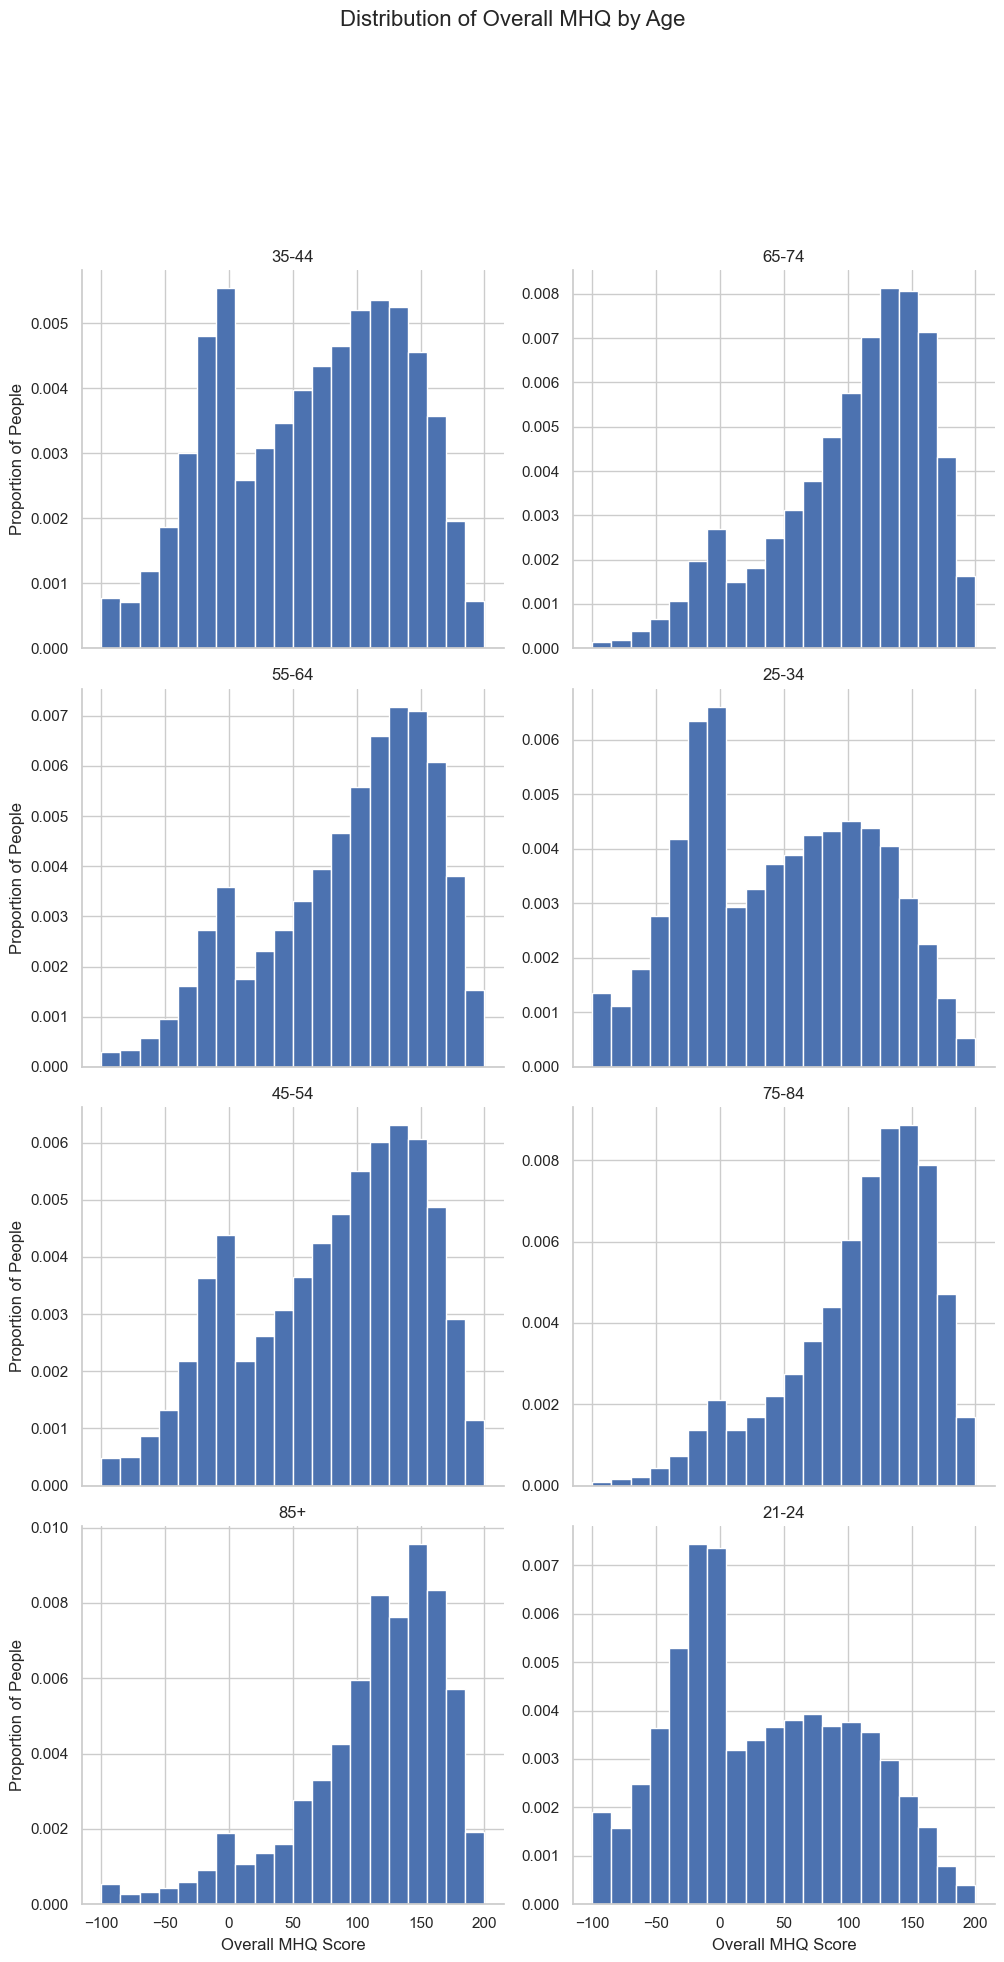

In [22]:
filtered_df = df[df['Age'].isin(['21-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+'])]

sns.set(style="whitegrid")

g = sns.FacetGrid(filtered_df, col='Age', col_wrap=2, height=5, aspect=1, sharey=False)

g.map(plt.hist, 'Overall MHQ', bins=20, edgecolor='white', density=True)

g.set_axis_labels('Overall MHQ Score', 'Proportion of People')
g.set_titles(col_template='{col_name}')
g.fig.suptitle('Distribution of Overall MHQ by Age', fontsize=16)

plt.subplots_adjust(top=0.85)

plt.show()

That is much better! We can clearly see that younger people tend to have the lowest MHQ scores, and the older people get, their scores tend to be higher too. Let's see it all on one graph. 

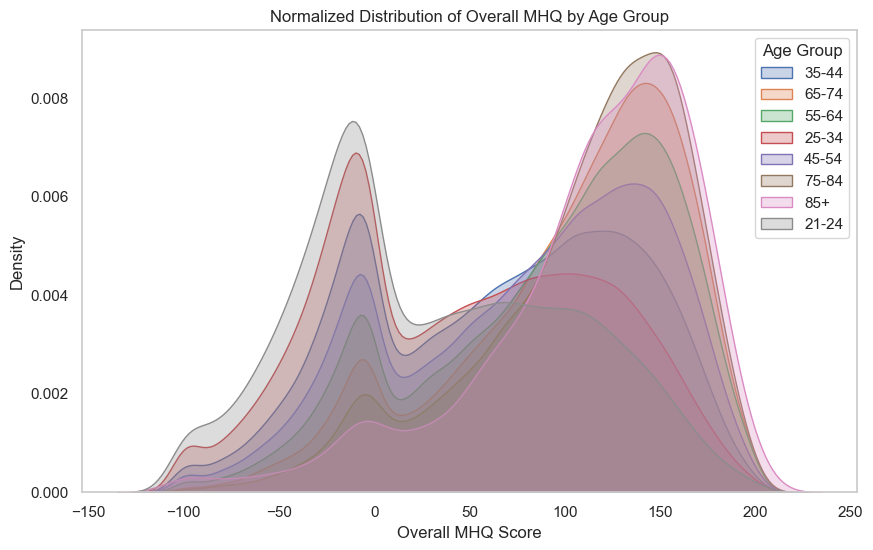

In [24]:
filtered_df = df[df['Age'].isin(['21-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+'])]

sns.set(style="whitegrid")

age_groups = filtered_df['Age'].unique()
overall_mhq_scores = filtered_df['Overall MHQ']

plt.figure(figsize=(10, 6))

for age in age_groups:
    group_data = filtered_df[filtered_df['Age'] == age]['Overall MHQ']
    
    sns.kdeplot(group_data, label=age, fill=True, alpha=0.3)

plt.xlabel('Overall MHQ Score')
plt.ylabel('Density')
plt.title('Normalized Distribution of Overall MHQ by Age Group')
plt.legend(title='Age Group')
plt.grid()

plt.show()

Now, I will calculate descriptive statistics for other factors too, not to have our notebook too graph heavy :) 
I've created more graphs using simple Tableau dashboard. 

In [26]:
grouped_stats = df.groupby('Biological Sex')['Overall MHQ'].agg(
    mean='mean',
    std='std',
    count='count',
    min='min',
    max='max'
).reset_index()

print(grouped_stats)

      Biological Sex       mean        std   count    min    max
0             Female  61.571743  73.453311  281135 -100.0  200.0
1               Male  78.496244  71.001249  232878 -100.0  200.0
2     Other/Intersex  25.301027  81.726218     779 -100.0  200.0
3  Prefer not to say  27.891392  77.977802    3311 -100.0  200.0
4       אחר/אינטרסקס   0.000000        NaN       1    0.0    0.0


In [27]:
grouped_stats = df.groupby('Country')['Overall MHQ'].agg(
    mean='mean',
    std='std',
    count='count',
    min='min',
    max='max'
).reset_index()

print(grouped_stats)

                  Country        mean        std  count    min    max
0             Afghanistan   43.179167  89.665701    264 -100.0  200.0
1                 Albania   51.183636  76.501690    110 -100.0  200.0
2                 Algeria   59.122508  67.572080  14426 -100.0  200.0
3          American Samoa   64.479424  80.277486    243 -100.0  196.2
4                 Andorra   65.141346  77.797811    104 -100.0  200.0
..                    ...         ...        ...    ...    ...    ...
229              Zimbabwe   83.858973  65.803361   2240 -100.0  199.2
230              Équateur   -6.900000        NaN      1   -6.9   -6.9
231                Бруней   95.700000   5.515433      2   91.8   99.6
232              אפגניסטן    0.000000        NaN      1    0.0    0.0
233  तुर्क और कैकोस द्वीप  130.400000        NaN      1  130.4  130.4

[234 rows x 6 columns]


In [28]:
grouped_stats = df.groupby('Place of living')['Overall MHQ'].agg(
    mean='mean',
    std='std',
    count='count',
    min='min',
    max='max'
).reset_index()

print(grouped_stats)

               Place of living       mean        std   count    min    max
0                 A large city  72.042577  72.406362  218708 -100.0  200.0
1  A rural or remote community  62.426639  74.383480   37059 -100.0  200.0
2         A small city or town  68.600110  72.994317  167092 -100.0  200.0
3   A suburb near a large city  69.678687  71.727163   74770 -100.0  200.0
4            Prefer not to say  46.880793  76.369266   20472 -100.0  200.0
5                    עיר גדולה   0.000000        NaN       1    0.0    0.0


In [29]:
grouped_stats = df.groupby('Education')['Overall MHQ'].agg(
    mean='mean',
    std='std',
    count='count',
    min='min',
    max='max'
).reset_index()

grouped_stats = grouped_stats.sort_values(by='mean', ascending=False)

print(grouped_stats)

                                   Education       mean        std   count  \
9                                        PhD  92.682007  67.502704   15656   
4                                       M.D.  91.408162  69.103622    4778   
5                            Master's Degree  84.779330  67.711462   76023   
3                                       J.D.  83.883561  70.200934    4471   
13                  Vocational certification  75.988752  71.507377   29348   
0                         Associate’s Degree  73.559937  72.403758   33280   
1                          Bachelor's Degree  71.708754  71.025767  155209   
6                                      Other  60.827533  75.177992   22108   
2                                High School  58.406622  74.178304  119760   
12                          Some High School  55.011759  74.738987   32026   
8   Other| I work in a different profession.  52.000000  96.890608       3   
11                         Primary Education  50.112073  75.9958

In [30]:
grouped_stats = df.groupby('Employment')['Overall MHQ'].agg(
    mean='mean',
    std='std',
    count='count',
    min='min',
    max='max'
).reset_index()

grouped_stats = grouped_stats.sort_values(by='mean', ascending=False)

print(grouped_stats)

                Employment        mean        std   count    min    max
3                  Retired  100.648476  60.824713   96632 -100.0  200.0
0  Employed /Self employed   76.930452  70.090140  249339 -100.0  200.0
1                Homemaker   61.236334  70.417097   48940 -100.0  200.0
5               Unemployed   40.467763  74.174729   42569 -100.0  200.0
4                 Studying   26.355282  69.896034   71040 -100.0  200.0
2         Not able to work   21.115176  73.771780    9581 -100.0  200.0
6                  בגמלאות    0.000000        NaN       1    0.0    0.0


In [31]:
grouped_stats = df.groupby('Work situation')['Overall MHQ'].agg(
    mean='mean',
    std='std',
    count='count',
    min='min',
    max='max'
).reset_index()

print(grouped_stats)

Empty DataFrame
Columns: [Work situation, mean, std, count, min, max]
Index: []


In [32]:
grouped_stats = df.groupby('Age')['Overall MHQ'].agg(
    mean='mean',
    std='std',
    count='count',
    min='min',
    max='max'
).reset_index()

print(grouped_stats)

      Age        mean        std  count    min    max
0      18   11.700590  67.833626  18808 -100.0  200.0
1   18-24   19.539299  68.501425  39739 -100.0  200.0
2      19   19.889357  68.147639   5769 -100.0  200.0
3      20   25.122602  68.778396   5327 -100.0  200.0
4   21-24   32.392556  69.746651  23657 -100.0  200.0
5   25-34   46.970946  70.870328  71144 -100.0  200.0
6   35-44   64.899249  70.103565  83369 -100.0  200.0
7   45-54   80.135625  68.559326  87727 -100.0  200.0
8   55-64   92.156147  65.562201  92678 -100.0  200.0
9   65-74  102.130947  60.615689  64495 -100.0  200.0
10  75-84  109.143134  56.303359  22275 -100.0  200.0
11    85+  112.079621  58.135166   3116 -100.0  200.0


There seem to be overlaps in the original dataset in the young age group. To fix that, I've created a new age group 18-24 to see the descriptive stats.  

In [34]:
data = {
    'Age Group': ['18', '18-24', '19', '20', '21-24'],
    'Mean': [11.700590, 19.539299, 19.889357, 25.122602, 32.392556],
    'Standard Deviation': [67.833626, 68.501425, 68.147639, 68.778396, 69.746651],
    'Count': [18808, 39739, 5769, 5327, 23657],
    'Min': [-100.0, -100.0, -100.0, -100.0, -100.0],
    'Max': [200.0, 200.0, 200.0, 200.0, 200.0]
}

df_stats = pd.DataFrame(data)

age_group_mapping = {
    '18': '18-24',
    '19': '18-24',
    '20': '18-24',
    '21-24': '18-24'
}

df_stats['Age Group'] = df_stats['Age Group'].replace(age_group_mapping)

combined_stats = df_stats.groupby('Age Group').agg(
    Mean=('Mean', 'mean'),
    Standard_Deviation=('Standard Deviation', 'mean'),  
    Count=('Count', 'sum'),  
    Min=('Min', 'min'),  
    Max=('Max', 'max')   
).reset_index()

print("\nCombined Statistics DataFrame:")
print(combined_stats)


Combined Statistics DataFrame:
  Age Group       Mean  Standard_Deviation  Count    Min    Max
0     18-24  21.728881           68.601547  93300 -100.0  200.0


Now let's also investigate different scores, not only MHQ quotient. There are different dimensions which eventually form the overall MHQ - it would be ineteresting to see how do they correlate with each other. 

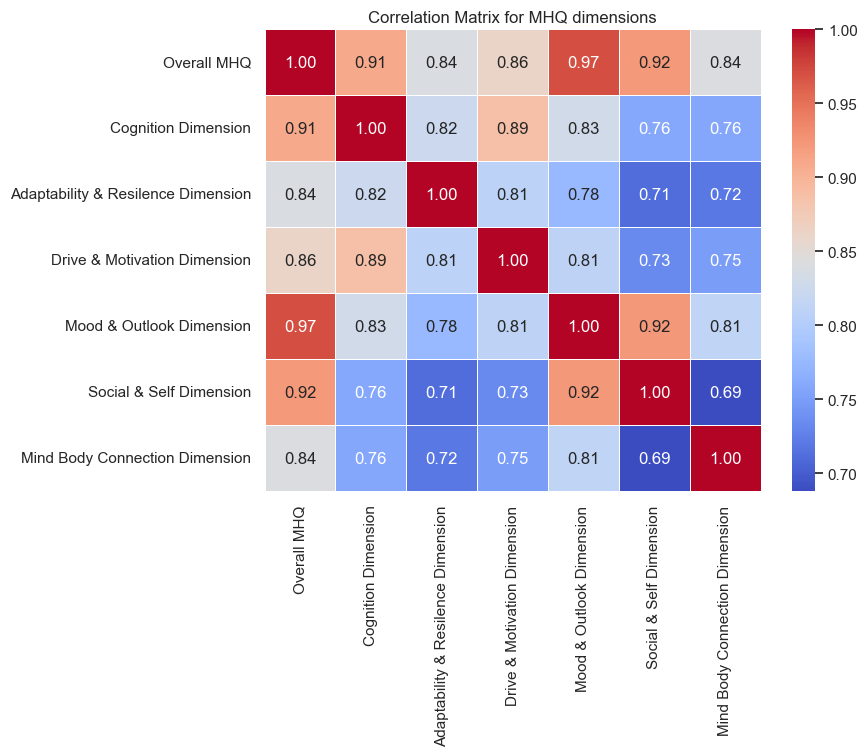

In [36]:
selected_columns = ['Overall MHQ', 'Cognition Dimension', 'Adaptability & Resilence Dimension',	'Drive & Motivation Dimension',	'Mood & Outlook Dimension',	'Social & Self Dimension', 'Mind Body Connection Dimension']

correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix for MHQ dimensions')
plt.show()

It could also be interesting to see scatter plots of data.

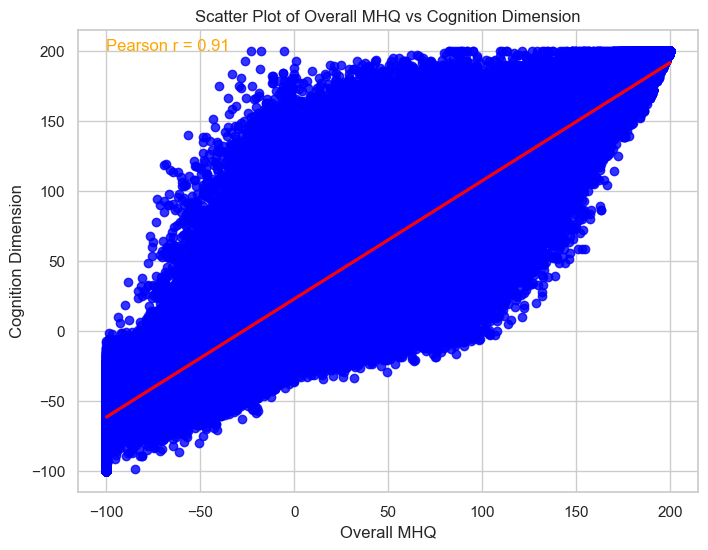

In [37]:
x = df['Overall MHQ']
y = df['Cognition Dimension']

plt.figure(figsize=(8,6))
sns.regplot(x=x, y=y, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.xlabel('Overall MHQ')
plt.ylabel('Cognition Dimension')
plt.title('Scatter Plot of Overall MHQ vs Cognition Dimension')

corr_coef, _ = pearsonr(x, y)

plt.text(min(x), max(y), f'Pearson r = {corr_coef:.2f}', fontsize=12, color='orange')

plt.show()

The scatter plot on its own may not be enough? Especially with a large data volume. 
I will try to reduce the volume by random sampling to be able to perform clustering. 
Here I used Agglomerative Clustering, which is a type of hierarchical clustering. 
The idea is to place similar data points in the same cluster and separate dissimilar ones into different clusters.

In [4]:
from sklearn.cluster import AgglomerativeClustering
cluster_agg = AgglomerativeClustering(n_clusters=3, linkage="ward")

In [10]:
df = pd.read_csv('mhm_data_2024-10-10_17-07-23.csv', sep=',', index_col=0, low_memory=False)

columns_to_keep = [
    'Overall MHQ', 
    'Cognition Dimension', 
    'Adaptability & Resilence Dimension', 
    'Drive & Motivation Dimension', 
    'Mood & Outlook Dimension', 
    'Social & Self Dimension', 
    'Mind Body Connection Dimension']

new_df = df[columns_to_keep]

sampled_df = new_df.sample(frac=0.01, random_state=42)

sampled_df.to_csv('sampled_data.csv', index=False)

In [12]:
print(sampled_df.columns)

Index(['Overall MHQ', 'Cognition Dimension',
       'Adaptability & Resilence Dimension', 'Drive & Motivation Dimension',
       'Mood & Outlook Dimension', 'Social & Self Dimension',
       'Mind Body Connection Dimension'],
      dtype='object')


In [12]:
features = ['Cognition Dimension',
       'Adaptability & Resilence Dimension', 'Drive & Motivation Dimension',
       'Mood & Outlook Dimension', 'Social & Self Dimension',
       'Mind Body Connection Dimension']

In [14]:
cluster_agg.fit(sampled_df[features])
labels = cluster_agg.labels_

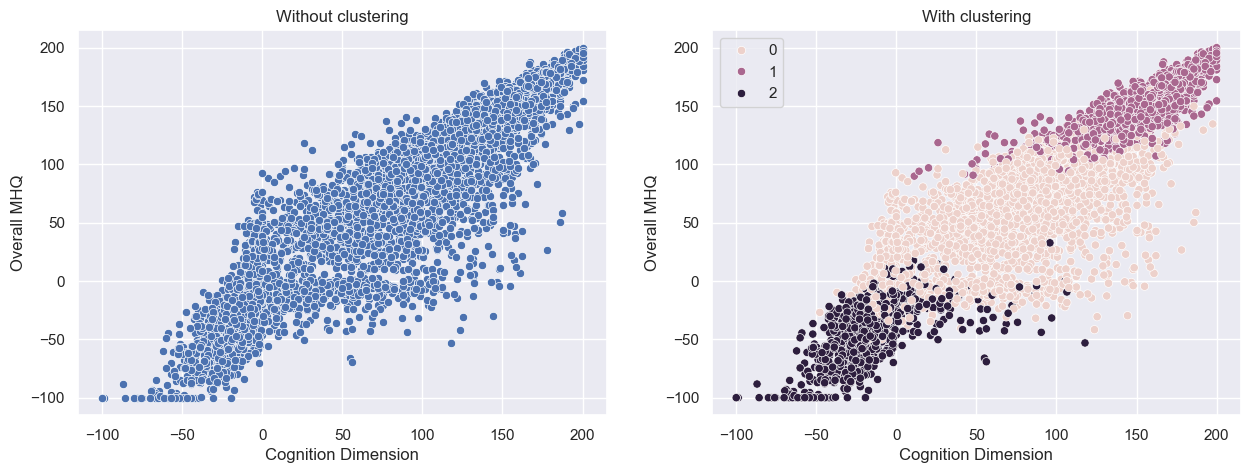

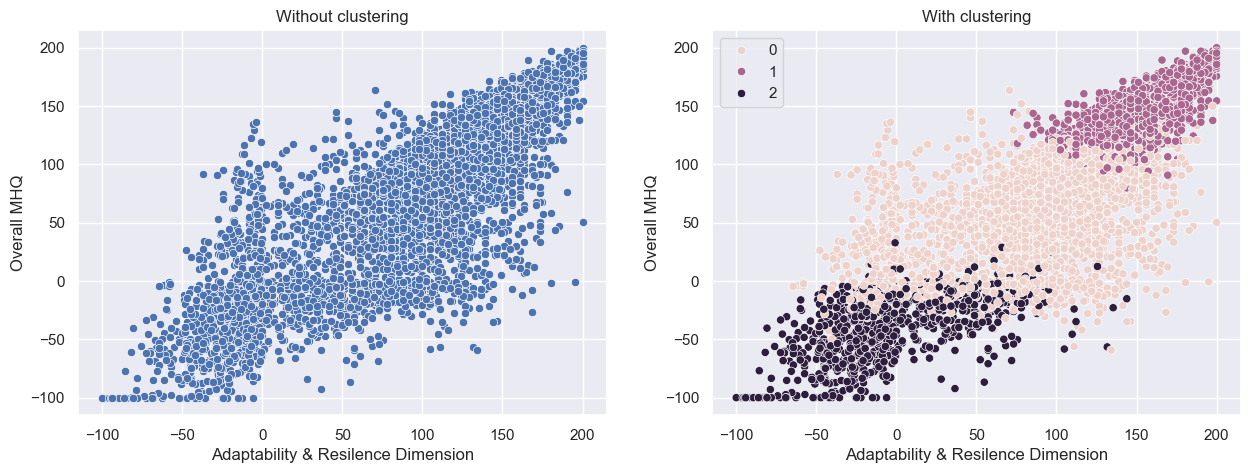

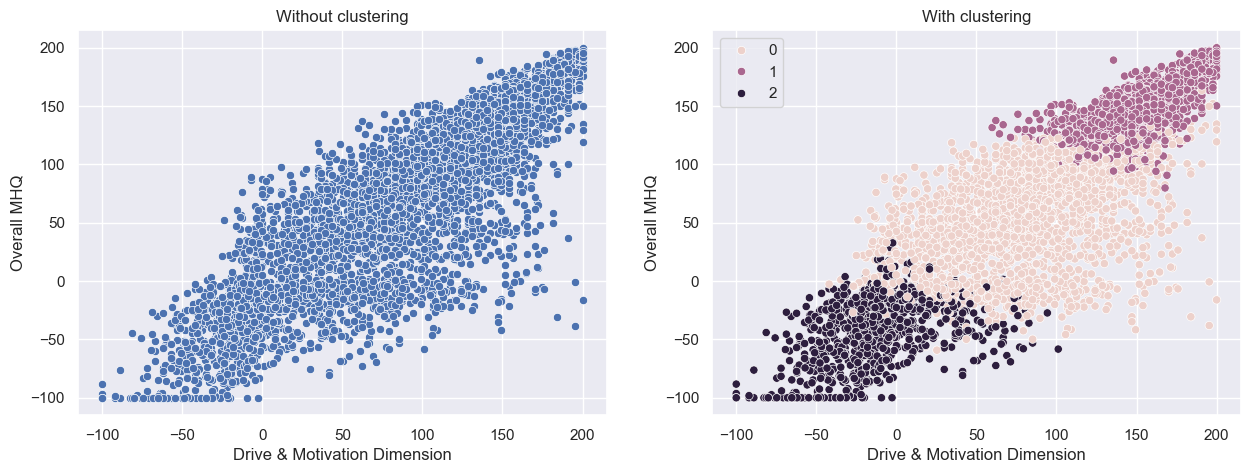

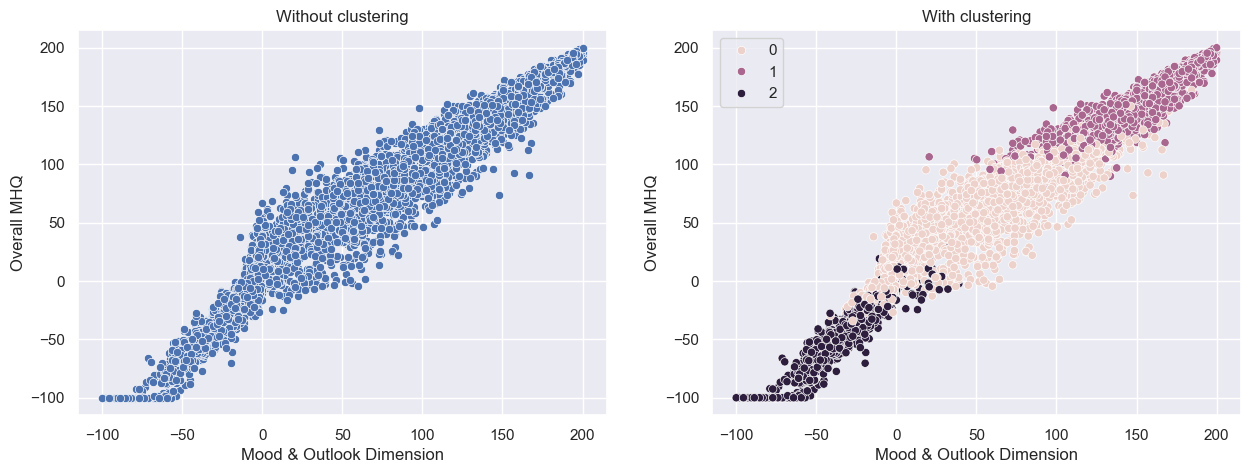

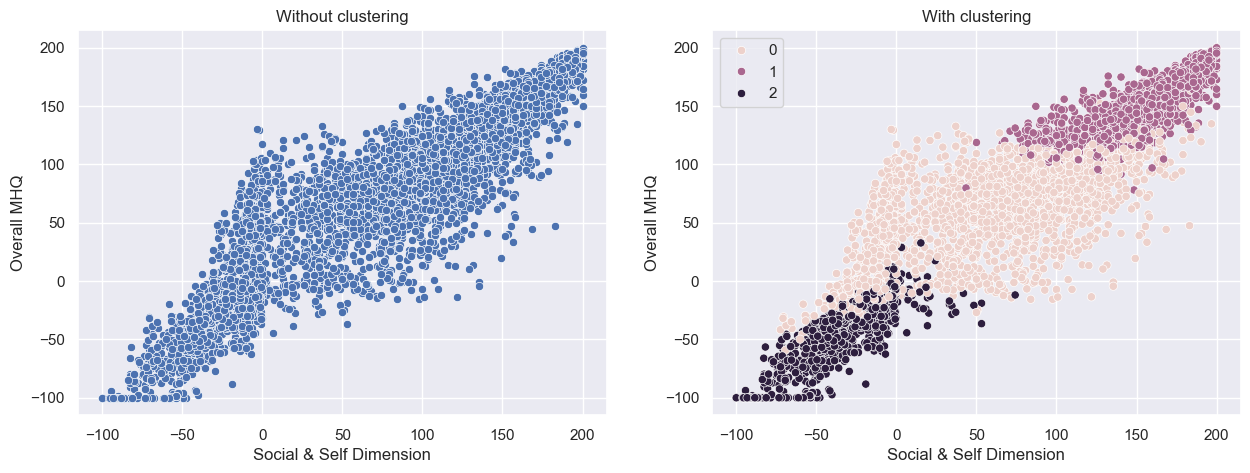

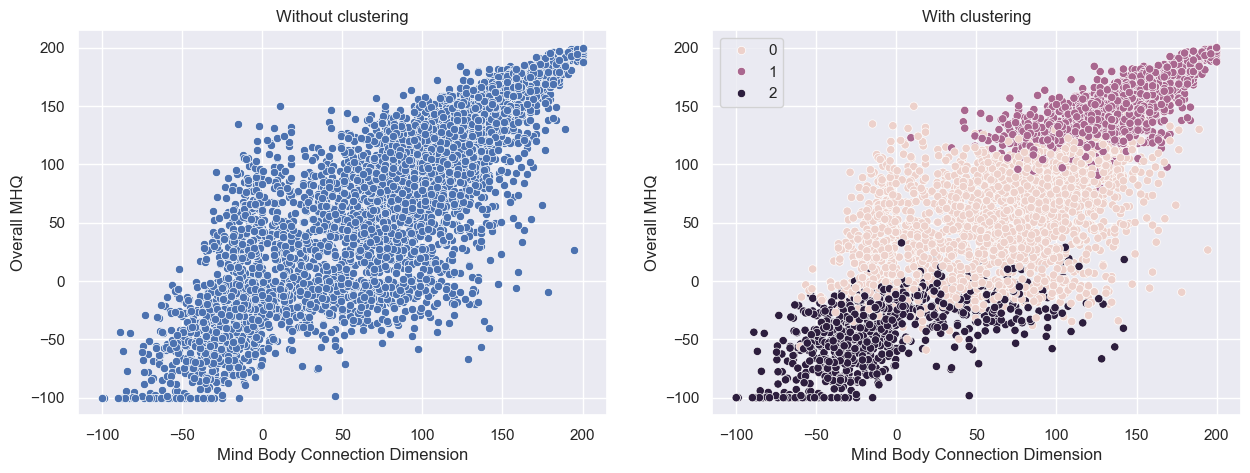

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=sampled_df, x='Cognition Dimension', 
                y='Overall MHQ').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=sampled_df, x='Cognition Dimension', 
                y='Overall MHQ', hue=cluster_agg.labels_).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=sampled_df, x='Adaptability & Resilence Dimension', 
                y='Overall MHQ').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=sampled_df, x='Adaptability & Resilence Dimension', 
                y='Overall MHQ', hue=cluster_agg.labels_).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=sampled_df, x='Drive & Motivation Dimension', 
                y='Overall MHQ').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=sampled_df, x='Drive & Motivation Dimension', 
                y='Overall MHQ', hue=cluster_agg.labels_).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=sampled_df, x='Mood & Outlook Dimension', 
                y='Overall MHQ').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=sampled_df, x='Mood & Outlook Dimension', 
                y='Overall MHQ', hue=cluster_agg.labels_).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=sampled_df, x='Social & Self Dimension', 
                y='Overall MHQ').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=sampled_df, x='Social & Self Dimension', 
                y='Overall MHQ', hue=cluster_agg.labels_).set_title('With clustering');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=sampled_df, x='Mind Body Connection Dimension', 
                y='Overall MHQ').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=sampled_df, x='Mind Body Connection Dimension', 
                y='Overall MHQ', hue=cluster_agg.labels_).set_title('With clustering');

Yey, we've managed to do clustering! Each correlation of Overall MHQ and another dimension is split into three clusters. 

Next, for further visualisations in Tableau I keep the columns from the original dataset with values which I want to include on my dashboard. 

In [36]:
df = pd.read_csv('mhm_data_2024-10-10_17-07-23.csv',sep=',',index_col=0, low_memory=False)
columns_to_keep = [
'Overall MHQ', 
'Cognition Dimension', 
'Adaptability & Resilence Dimension', 
'Drive & Motivation Dimension', 
'Mood & Outlook Dimension', 
'Social & Self Dimension', 
'Mind Body Connection Dimension', 

'Adaptability to Change', 
'Self Worth & Confidence', 
'Creativity & Problem Solving', 
'Drive & Motivation', 
'Stability & Calmness', 
'Sleep Quality', 
'Self Control & Impulsivity', 
'Ability to Learn', 
'Coordination', 
'Relationships with others', 
'Emotional Resilience', 
'Planning & Organisation', 
'Physical Intimacy', 
'Speech & Language', 
'Memory', 
'Social interactions & Cooperation', 
'Decision-making & Risk-taking', 
'Curiosity, Interest & Enthusiasm', 
'Energy Level', 
'Emotional Control', 
'Focus & Concentration', 
'Appetite Regulation', 
'Empathy', 
'Sensory Sensitivity', 
'Self-Image', 
'Outlook & Optimism', 
'Selective Attention', 
'Restlessness & Hyperactivity', 
'Fear & Anxiety', 
'Susceptibility to Infections', 
'Aggression Towards Others', 
'Avoidance & Withdrawal', 
'Unwanted, Strange or Obsessive Thoughts',
'Mood Swings', 
'Sense of being detached from reality', 
'Nightmares', 
'Addictions', 
'Anger & Irritability', 
'Suicidal Thoughts or Intentions', 
'Experience of Pain', 
'Guilt & Blame', 
'Hallucinations', 
'Traumatic Flashbacks', 
'Repetitive or Compulsive Actions', 
'Feelings of Sadness, Distress or Hopelessness', 
'Physical Health Issues', 
'Confusion or Slowed Thinking',

'Age',
'Biological Sex',
'Country',
'Place of living',
'Education',
'Employment',
'Frequency of doing exercise',
'Frequency of Socializing',
'Presence/Absence of Diagnosed Medical Disorder',
'Current Family Situation',
'Number of Children'
]


new_df = df[columns_to_keep]
new_df.to_csv('new_selected_columns.csv', index=False)

In [38]:
new_df.head()

,Overall MHQ,Cognition Dimension,Adaptability & Resilence Dimension,Drive & Motivation Dimension,Mood & Outlook Dimension,Social & Self Dimension,Mind Body Connection Dimension,Adaptability to Change,Self Worth & Confidence,Creativity & Problem Solving,...,Biological Sex,Country,Place of living,Education,Employment,Frequency of doing exercise,Frequency of Socializing,Presence/Absence of Diagnosed Medical Disorder,Current Family Situation,Number of Children
Language,,,,,,,,,,,,,,,,,,,,,
Spanish,44.7,-5.4,114.6,43.7,51.7,90.3,85.9,6.0,6.0,4.0,...,Male,Venezuela,A small city or town,Bachelor's Degree,Unemployed,Everyday,Several days a week,No,In a relationship,1
Brazilian Portuguese,135.4,129.0,134.1,124.1,132.7,145.2,112.7,7.0,8.0,5.0,...,Male,Brazil,A small city or town,Bachelor's Degree,Retired,Rarely/Never,Once a week,No,Married/Civil Partnership,2
Hindi,146.8,140.8,-1.1,200.0,179.5,183.1,150.9,9.0,9.0,9.0,...,Male,India,A small city or town,Bachelor's Degree,Employed /Self employed,Everyday,1-3 times a month,No,In a cohabiting relationship,1
English,88.2,81.7,80.5,52.9,82.9,90.3,116.4,5.0,7.0,4.0,...,Female,Nigeria,A large city,Bachelor's Degree,Employed /Self employed,Rarely/Never,1-3 times a month,No,Single living with parents,NaN
Spanish,174.9,187.0,163.4,174.7,165.9,182.3,167.3,8.0,8.0,9.0,...,Female,Bolivia,A large city,Bachelor's Degree,Employed /Self employed,Rarely/Never,Several days a week,No,Married/Civil Partnership,1


And that's the end! I will try to perform some more analysis on this data set in the future as I'm sure there are still many things to discover!